# Group Project - Literacy Analysis Notebook

The hypothesis this notebook will be addressing is that "Internet penetration rates are positively correlated with access to quality education and educational resources" so we'll be looking at the relationship between the Internet Penetration and Literacy Rates. 

## Table of Contents
1. [Imports](#imports)
2. [Data Cleaning and Exploration](#dataexplore)
4. [Analysis](#modeling1)
5. [Conclusion](#conclusion)

## Data and Library Imports <a name="imports"></a>
Pulling in dataset and relevant libraries and setting the chart theme

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from scipy import stats

In [2]:
sns.set()
plt.rcdefaults()
color_list = ['#23CECC','#97D2FF','#7BCE23','#26CE23','#23CE76','#237BCE','#2325CE']

sns.set_palette(color_list)
plt.rcParams['figure.facecolor'] = '#EEFFFE'

In [3]:
data = pd.read_csv("data/internet_and_development_13122023.csv")
data

,Country,Region,ISO,Year,"Individuals using the Internet, total (%)",GNI per capita,GINI Index,GDP Per Capita,Happiness Index,Literacy,Suicide Rates,CO2 Emissions,Internet_Price,Internet Price Ratio,Voter Turnout
0,Afghanistan,Asia & Pacific,AFG,2010,4.000000,520.0,NaN,554.594735,NaN,NaN,4.3,0.304230,NaN,NaN,35.14
1,Afghanistan,Asia & Pacific,AFG,2011,5.000000,550.0,NaN,621.912414,NaN,31.448851,4.1,0.408965,NaN,NaN,NaN
2,Afghanistan,Asia & Pacific,AFG,2012,5.454545,650.0,NaN,663.141053,NaN,NaN,4.0,0.335061,NaN,NaN,NaN
3,Afghanistan,Asia & Pacific,AFG,2013,5.900000,680.0,NaN,651.987862,4.04,NaN,4.0,0.298088,NaN,NaN,NaN
4,Afghanistan,Asia & Pacific,AFG,2014,7.000000,650.0,NaN,628.146804,NaN,NaN,3.9,0.283692,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2682,Kuwait,Arab States,KWT,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.27
2683,Monaco,Europe,MCO,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.26
2684,Oman,Arab States,OMN,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.85
2685,Timor-Leste,Asia & Pacific,TLS,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.28


## Data Cleaning and Exploration <a name="dataexplore"></a>
Exploring and cleaning the data

In [4]:
data.isnull().sum()

Country                                         0
Region                                          0
ISO                                             0
Year                                            0
Individuals using the Internet, total (%)     379
GNI per capita                                275
GINI Index                                   1803
GDP Per Capita                                215
Happiness Index                              1203
Literacy                                     2201
Suicide Rates                                 855
CO2 Emissions                                 595
Internet_Price                               1673
Internet Price Ratio                         1677
Voter Turnout                                2107
dtype: int64

In [5]:
lit_count_country = data[data["Country"].notnull()].groupby(["Year"])["Literacy"].count()
lit_count_country

Year
2010    45
2011    55
2012    43
2013    31
2014    44
2015    37
2016    30
2017    27
2018    36
2019    26
2020    27
2021    41
2022    44
2023     0
Name: Literacy, dtype: int64

With a lot of missing data for Literacy we'll have to drop the nulls.

In [6]:
data.dropna(subset=["Literacy", "Individuals using the Internet, total (%)"], inplace=True)
data

,Country,Region,ISO,Year,"Individuals using the Internet, total (%)",GNI per capita,GINI Index,GDP Per Capita,Happiness Index,Literacy,Suicide Rates,CO2 Emissions,Internet_Price,Internet Price Ratio,Voter Turnout
1,Afghanistan,Asia & Pacific,AFG,2011,5.000000,550.0,NaN,621.912414,NaN,31.448851,4.1,0.408965,NaN,NaN,NaN
14,Albania,Europe,ALB,2011,47.000000,4410.0,NaN,4437.141146,NaN,96.845299,7.9,1.768109,46.887617,1.063211,NaN
15,Albania,Europe,ALB,2012,49.400000,4360.0,29.0,4247.631356,NaN,97.246971,5.2,1.565921,24.351196,0.558514,NaN
25,Albania,Europe,ALB,2022,82.613686,6770.0,NaN,6802.804519,5.199,98.500000,NaN,NaN,NaN,NaN,NaN
34,Algeria,Arab States,DZA,2018,49.038468,4010.0,NaN,4171.795309,5.295,81.407837,2.5,3.924299,19.740795,0.492289,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2498,Viet Nam,Asia & Pacific,VNM,2019,68.661580,3340.0,NaN,3491.091279,5.175,95.753868,7.5,3.567848,10.891937,0.326106,NaN
2515,Zambia,Africa,ZMB,2010,3.000000,1330.0,52.0,1469.361450,NaN,83.007668,10.1,0.192639,NaN,NaN,NaN
2525,Zambia,Africa,ZMB,2020,18.051915,1130.0,NaN,956.831747,3.759,87.500000,NaN,0.401903,NaN,NaN,NaN
2529,Zimbabwe,Africa,ZWE,2011,8.400000,950.0,43.2,1082.615773,NaN,83.582710,20.7,0.871932,NaN,NaN,NaN


In [7]:
data.isnull().sum()

Country                                        0
Region                                         0
ISO                                            0
Year                                           0
Individuals using the Internet, total (%)      0
GNI per capita                                 4
GINI Index                                   244
GDP Per Capita                                 4
Happiness Index                              203
Literacy                                       0
Suicide Rates                                 76
CO2 Emissions                                 48
Internet_Price                               207
Internet Price Ratio                         208
Voter Turnout                                343
dtype: int64

In [8]:
lit_count_country = data.groupby(["Country"])["Literacy"].count()
lit_count_country[lit_count_country == 1]

Country
Afghanistan              1
Algeria                  1
Angola                   1
Bahrain                  1
Belarus                  1
Benin                    1
Botswana                 1
Comoros                  1
Congo (Rep. of the)      1
Croatia                  1
Equatorial Guinea        1
Ethiopia                 1
Gabon                    1
Guinea-Bissau            1
Guyana                   1
Haiti                    1
Hungary                  1
India                    1
Kenya                    1
Korea (Rep. of)          1
Kyrgyzstan               1
Lebanon                  1
Lesotho                  1
Liberia                  1
Marshall Islands         1
Nicaragua                1
Niger                    1
Nigeria                  1
North Macedonia          1
Papua New Guinea         1
Poland                   1
Sao Tome and Principe    1
Sierra Leone             1
South Sudan              1
Sudan                    1
Syrian Arab Republic     1
Tajikistan          

As there's quite a lot of countries with a Literacy value for jsut one year, we won't look at the rate of change but rather the average across the years.

In [9]:
avg_internet_literacy = data.groupby(['Country', 'Region'])[['Individuals using the Internet, total (%)', 'Literacy']].mean().reset_index()
avg_internet_literacy

,Country,Region,"Individuals using the Internet, total (%)",Literacy
0,Afghanistan,Asia & Pacific,5.000000,31.448851
1,Albania,Europe,59.671229,97.530757
2,Algeria,Arab States,49.038468,81.407837
3,Angola,Africa,21.400000,66.030113
4,Armenia,CIS,59.399654,99.753374
...,...,...,...,...
134,Vanuatu,Asia & Pacific,42.567834,86.899998
135,Venezuela,The Americas,52.740000,96.167508
136,Viet Nam,Asia & Pacific,68.661580,95.753868
137,Zambia,Africa,10.525957,85.253834


## Analysing the relationship <a name="modeling"></a>

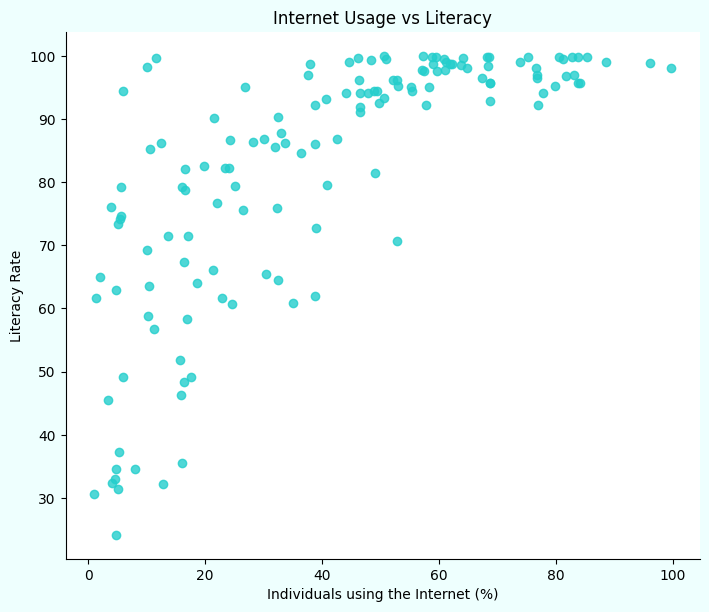

In [10]:
sns.lmplot(x='Individuals using the Internet, total (%)', y='Literacy', data=avg_internet_literacy, fit_reg=False, height=6, aspect=1.2)
plt.title('Internet Usage vs Literacy')
plt.xlabel('Individuals using the Internet (%)')
plt.ylabel('Literacy Rate')
plt.show()


Seeing this plot, there's clearly a logarithmic type curve relationship between Internet penetration and Literacy rates. Trying a 2nd degree polynomial fit below:

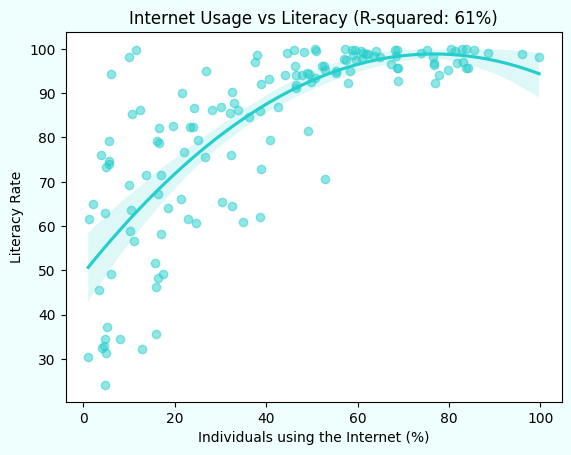

In [11]:
sns.regplot(x='Individuals using the Internet, total (%)', y='Literacy', data=avg_internet_literacy, scatter_kws={'alpha': 0.5}, order=2)

x = avg_internet_literacy['Individuals using the Internet, total (%)']
y = avg_internet_literacy['Literacy']
coefficients = np.polyfit(x, y, 2)
polynomial = np.poly1d(coefficients)
y_pred = polynomial(x)
r_squared = r2_score(y, y_pred)

plt.title(f'Internet Usage vs Literacy (R-squared: {r_squared:.0%})')
plt.xlabel('Individuals using the Internet (%)')
plt.ylabel('Literacy Rate')
plt.show()


Now trying a regression with a log transformation so to fit logarithmic curve instead

R-squared: 0.7360

p-value: 0.0000

Std Error: 0.0185



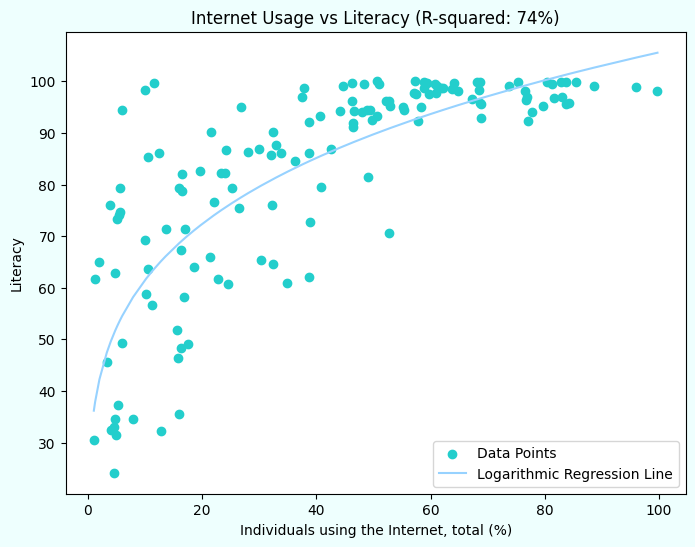

In [12]:
x = avg_internet_literacy['Individuals using the Internet, total (%)']
y = avg_internet_literacy['Literacy']

sorted_indices = x.argsort()
x_sorted = x.iloc[sorted_indices]
y_sorted = y.iloc[sorted_indices]

log_x = np.log(x_sorted)
log_y = np.log(y_sorted)

slope, intercept, r_value, p_value, std_err = stats.linregress(log_x, log_y)

print(f'R-squared: {r_value:.4f}\n')
print(f'p-value: {p_value:.4f}\n')
print(f'Std Error: {std_err:.4f}\n')

plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Data Points')
plt.plot(x_sorted, np.exp(intercept) * (x_sorted ** slope), color='#97D2FF', label='Logarithmic Regression Line')
plt.title(f'Internet Usage vs Literacy (R-squared: {r_value:.0%})')
plt.xlabel('Individuals using the Internet, total (%)')
plt.ylabel('Literacy')
plt.legend()


So certainly the logarthimic curve fits much better than the 2nd degree polynomial curve, now achieving a 74% R-squared and a highly significant p-value. Looking below what this looks by region. 

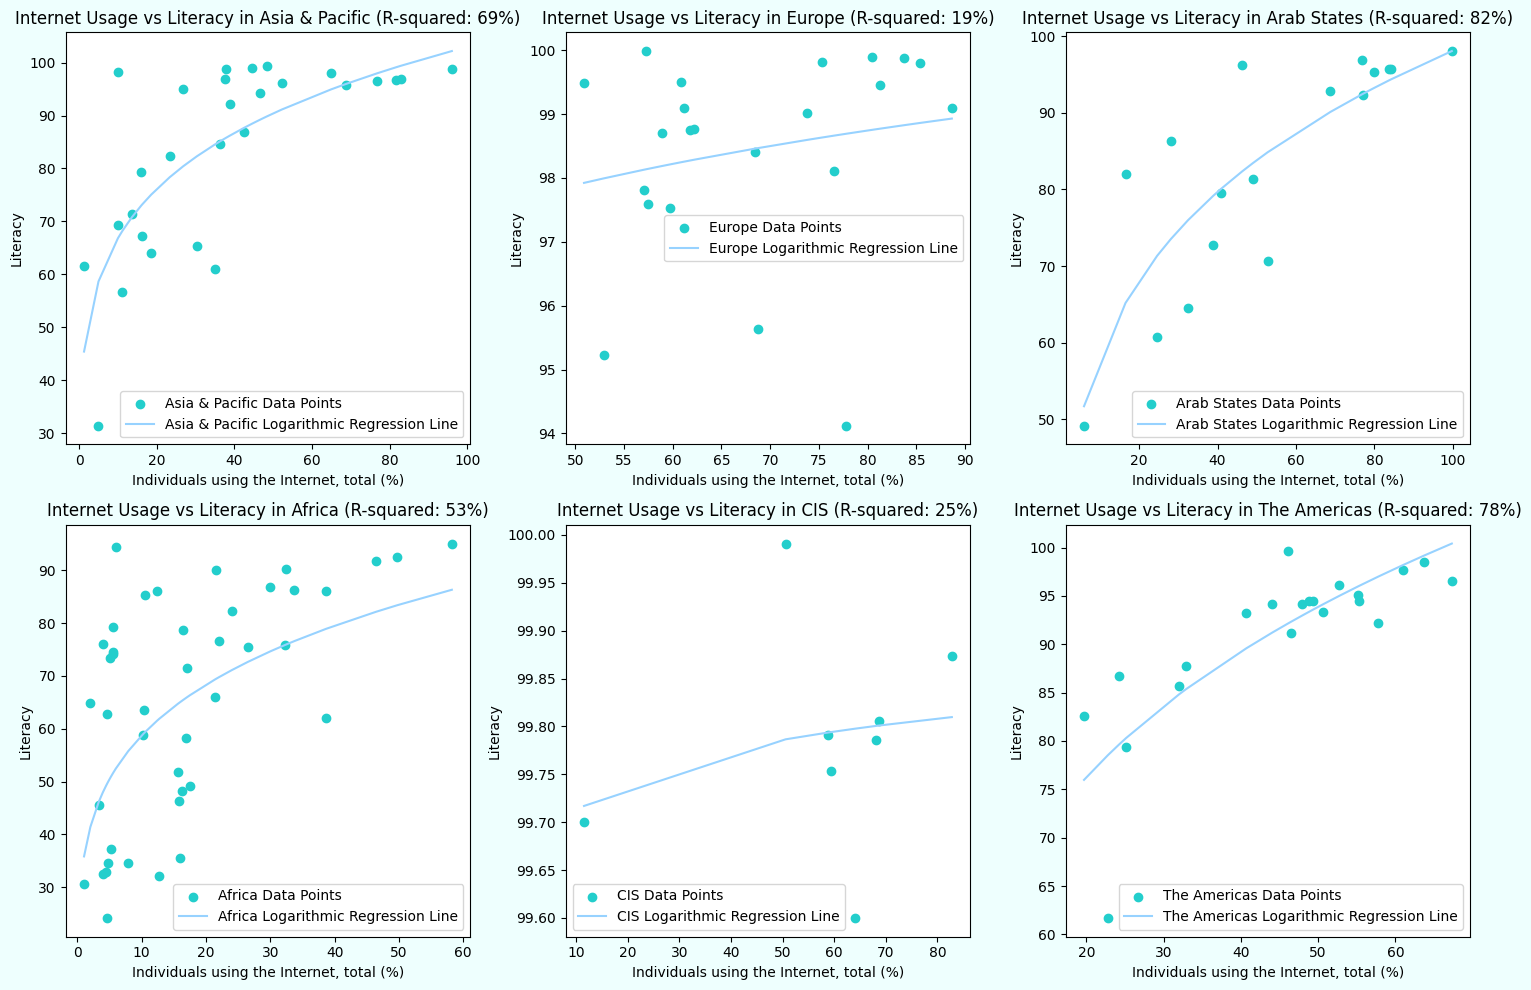

In [13]:
regions = avg_internet_literacy['Region'].unique()

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for idx, region in enumerate(regions):
    region_data = avg_internet_literacy[avg_internet_literacy['Region'] == region]
    x = region_data['Individuals using the Internet, total (%)']
    y = region_data['Literacy']
    
    sorted_indices = x.argsort()
    x_sorted = x.iloc[sorted_indices]
    y_sorted = y.iloc[sorted_indices]

    log_x = np.log(x_sorted)
    log_y = np.log(y_sorted)

    slope, intercept, r_value, p_value, std_err = stats.linregress(log_x, log_y)

    ax = axs[idx // 3, idx % 3]
    ax.scatter(x, y, label=f'{region} Data Points')
    ax.plot(x_sorted, np.exp(intercept) * (x_sorted ** slope), color='#97D2FF', label=f'{region} Logarithmic Regression Line')
    ax.set_title(f'Internet Usage vs Literacy in {region} (R-squared: {r_value:.0%})')
    ax.set_xlabel('Individuals using the Internet, total (%)')
    ax.set_ylabel('Literacy')
    ax.legend()

plt.tight_layout()
plt.show()


The Arab States has the strongest relationship between Internet Penetration rates and Literacy with an R-Squared of 82%, The Americas comes in a close second with 78%. 

## Conclusion <a name="conclusion"></a>

The analysis indicates a strong relationship between average literacy rates (2010-2022) and average internet penetration rates (2010-2022) globally, supported by a highly significant p-value (p < 0.01) and an R-squared value of 0.74. This tells us that approximately 74% of the variability in literacy rates can be explained by variations in internet penetration rates at a global level.

We do see differences between regions where there are varying strengths of the relationship. The Arab States has the strongest association, with an R-squared value of 0.82, followed by The Americas with an R-squared value of 0.78.

The analysis shows a logarithmic relationship between these variables, suggesting a non-linear impact of changes in internet penetration rates on literacy rates.

While the statistical association is evident, it's important to note that this analysis does not establish causation. Further exploration and research would be needed to understand the causal factors and implications behind this relationship.

In summary, these findings underscore the significance of exploring the interplay between internet penetration and literacy rates. Such insights hold potential implications for policymakers, educators, and researchers, necessitating deeper investigation to comprehend the dynamics and implications of this association.